# Finding the Best Pokémon!

## Imports

In [1]:
import numpy as np
import pandas as pd
from ast import literal_eval
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
sns.set(rc={'axes.edgecolor':'gray', 
            'axes.labelcolor': 'gray', 
            'xtick.color': 'gray', 
            'ytick.color': 'gray', 
            'text.color': 'gray',
            'figure.figsize': (20, 10), 
            'legend.fontsize': 12, 
            'font.size': 12, 
            'legend.title_fontsize': 14, 
            'axes.labelsize': 14,
            'axes.titlesize': 24}, 
        style='white')

## Descriptive Statistics

Loading Data, look at descriptive statistics and checking missing values

In [2]:
df = pd.read_csv('dataset/pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
# Unique type1 & type 2 in df
print(f'Primary type: {df.type1.nunique()}')
print(f'Secondary type: {df.type2.nunique()}')

Primary type: 18
Secondary type: 18


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116e+00,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970e+00,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543e+00,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456e+00,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884e+00,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020e+00,0.788896,0.25,0.5,1.0,1.0,4.0


In [5]:
df.isnull().sum()[df.columns[df.isnull().any()]]

height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64

## Data Processing

Discarding unnecessary columns from the data and create some custom columns which will be useful throughout the analysis. Renaming columns and some values for plotting.

In [6]:
df.drop(['japanese_name', 'pokedex_number', 'base_egg_steps', 'classfication', 'percentage_male'],
                axis=1, inplace=True)

In [7]:
# .title on all columns & values of type1 & type2
df.rename(str.title, axis='columns', inplace=True)

types = [t for t in list(df['Type1'].unique())]

df['Type1'].replace(types, [t.title() for t in types], inplace=True)
df['Type2'].replace(types, [t.title() for t in types], inplace=True)

In [8]:
# adding single type columne by merging typ1 & type 2
df['Type'] = df.apply(lambda x: x['Type1'] if pd.isnull(x['Type2']) else f'{x.Type1}_{x.Type2}', axis=1)

In [9]:
# column is a stringified list so converting it back to a list
df['Abilities'] = df.apply(lambda x: literal_eval(x['Abilities']), axis=1)

In [10]:
# creating a column with the number of abilities.
df['N_Abilities'] = df.apply(lambda x: len(x['Abilities']), axis=1)

In [11]:
# creating the BMI column
df['BMI'] = df.apply(lambda x: x['Weight_Kg']/(x['Height_M']**2), axis=1)

In [12]:
# Minior has two capture rates, so ignoring such value by assigning it to NaN 
# and changing the column type to numeric.
df['Capture_Rate'].replace({'30 (Meteorite)255 (Core)': np.nan}, inplace=True)
df['Capture_Rate'] = pd.to_numeric(df['Capture_Rate'])

## Data Visualization

### 1. New Pokémon by Generation

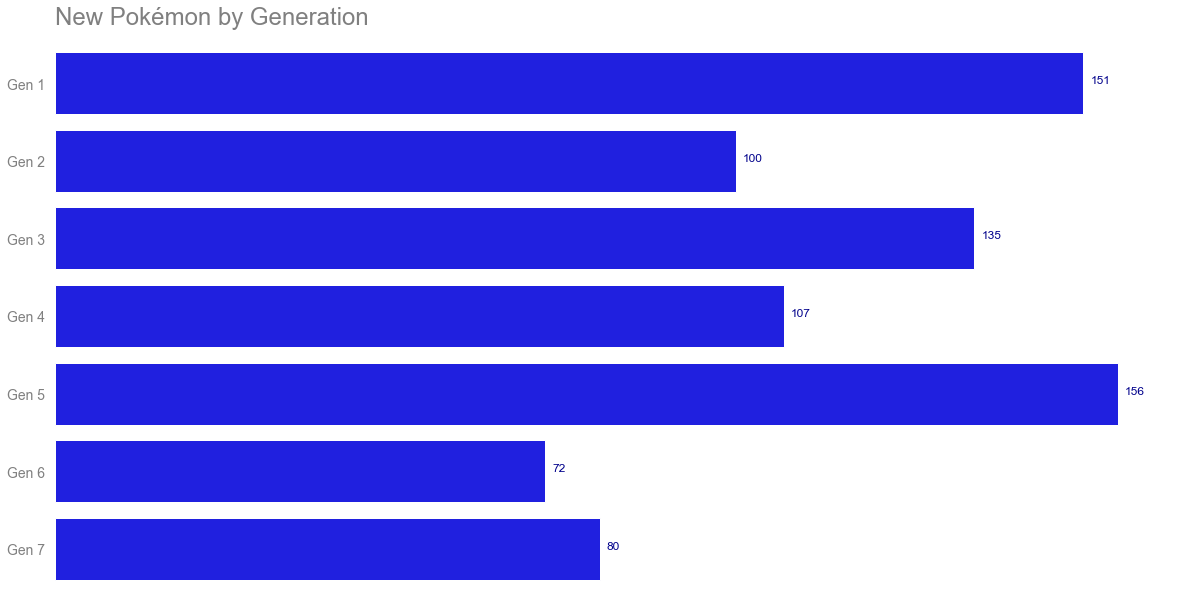

In [13]:
generations = [f'Gen {g}' for g in df.Generation.unique()]

ax = sns.countplot(y=df.Generation, orient='v', color='blue')

ax.set_xlabel(xlabel='')
ax.set_xticklabels([])

ax.set_ylabel(ylabel='')
ax.set_yticklabels(generations, size=14)

ax.set_title('New Pokémon by Generation', loc='left', pad=20)

sns.despine(top=True, right=True, left=True, bottom=True)

for index, value in enumerate(df.Generation.value_counts().sort_index()): 
    plt.annotate(f'{value}', xy=(value + 1, index), color='darkblue')

### Odd generations have more new pokémon compare to even one.

### 2. Most common primary types

In [14]:
type1_value_counts = df['Type1'].value_counts()
print(type1_value_counts)

Water       114
Normal      105
Grass        78
Bug          72
Psychic      53
Fire         52
Rock         45
Electric     39
Poison       32
Ground       32
Dark         29
Fighting     28
Ghost        27
Dragon       27
Steel        24
Ice          23
Fairy        18
Flying        3
Name: Type1, dtype: int64


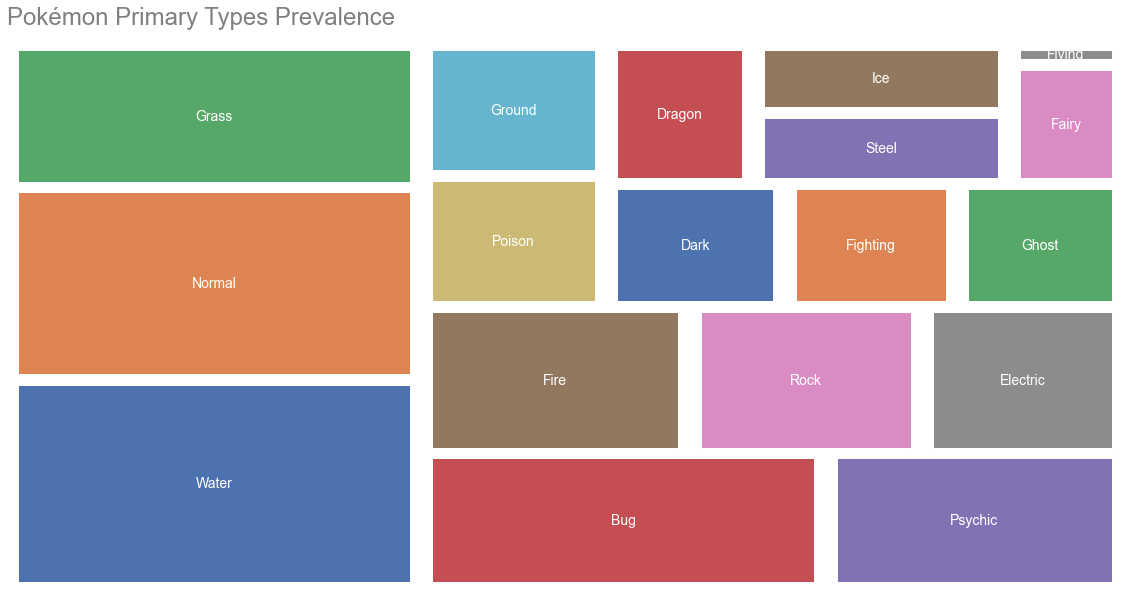

In [15]:
ax = squarify.plot(type1_value_counts, 
              label=type1_value_counts.index,
              color=sns.color_palette(),
              pad=1,
              text_kwargs={'fontsize': 14, 'color': 'white'})

ax.set_title('Pokémon Primary Types Prevalence', loc='left', pad=20)

plt.axis('off');

### Water type pokémon are the most common, followed by normal and grass.

### 3. Secondary types

In [16]:
print(f'''Note that a very large number of Pokémon don't have a secondary type: {df["Type2"].isnull().sum()}''')

Note that a very large number of Pokémon don't have a secondary type: 384


In [17]:
type2_value_counts = df['Type2'].value_counts()
type2_value_counts

Flying      95
Poison      34
Ground      34
Fairy       29
Psychic     29
Fighting    25
Steel       22
Dark        21
Grass       20
Water       17
Dragon      17
Ice         15
Rock        14
Ghost       14
Fire        13
Electric     9
Bug          5
Normal       4
Name: Type2, dtype: int64

In [18]:
types_df = pd.concat([type1_value_counts, type2_value_counts], axis=1)
types_df.sort_values(by='Type2', ascending=False, inplace=True)

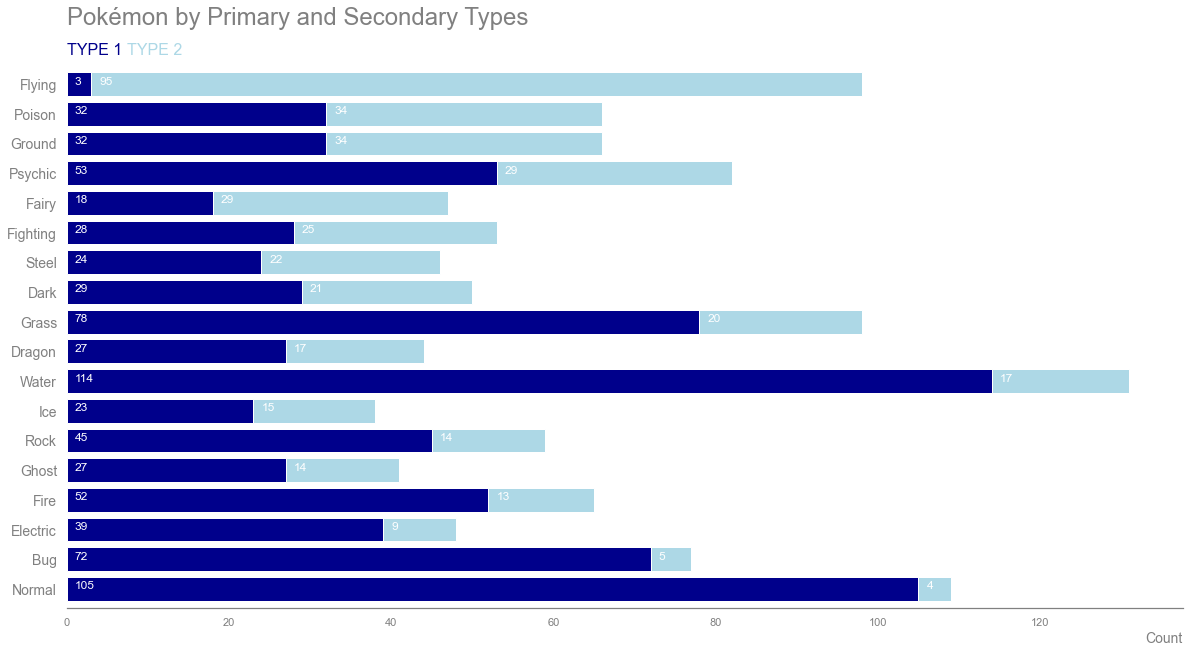

In [19]:
ax = types_df.plot.barh(stacked=True, color=['darkblue', 'lightblue'], width=0.8)

ax.invert_yaxis()

ax.get_legend().remove()

ax.annotate('TYPE 1', xy=(0, 0), xytext=(0, -1), color='darkblue', size=16)
ax.annotate('TYPE 2', xy=(7.5, 0), xytext=(7.5, -1), color='lightblue', size=16)

ax.set_xlabel(xlabel='Count', loc='right')

ax.set_yticklabels(ax.get_yticklabels(), size=14)

ax.set_title('Pokémon by Primary and Secondary Types', loc='left', pad=40)

sns.despine(top=True, right=True, left=True)

for index, row in enumerate(types_df.iterrows()): 
    plt.annotate(f'{row[1]["Type1"]}', xy=(1, index), color='white') 
    plt.annotate(f'{row[1]["Type2"]}', xy=(row[1]['Type1'] + 1, index), color='white') 

### Flying is the most common type 2, followed by poison and ground.

### 4. Most common type combinations

In [20]:
top10_type_counts = df[~df['Type2'].isnull()]['Type'].value_counts()[:10]
top10_type_counts

Normal_Flying    26
Grass_Poison     14
Bug_Flying       13
Bug_Poison       11
Water_Ground      9
Water_Flying      7
Rock_Ground       6
Fire_Flying       6
Fire_Fighting     6
Grass_Flying      6
Name: Type, dtype: int64

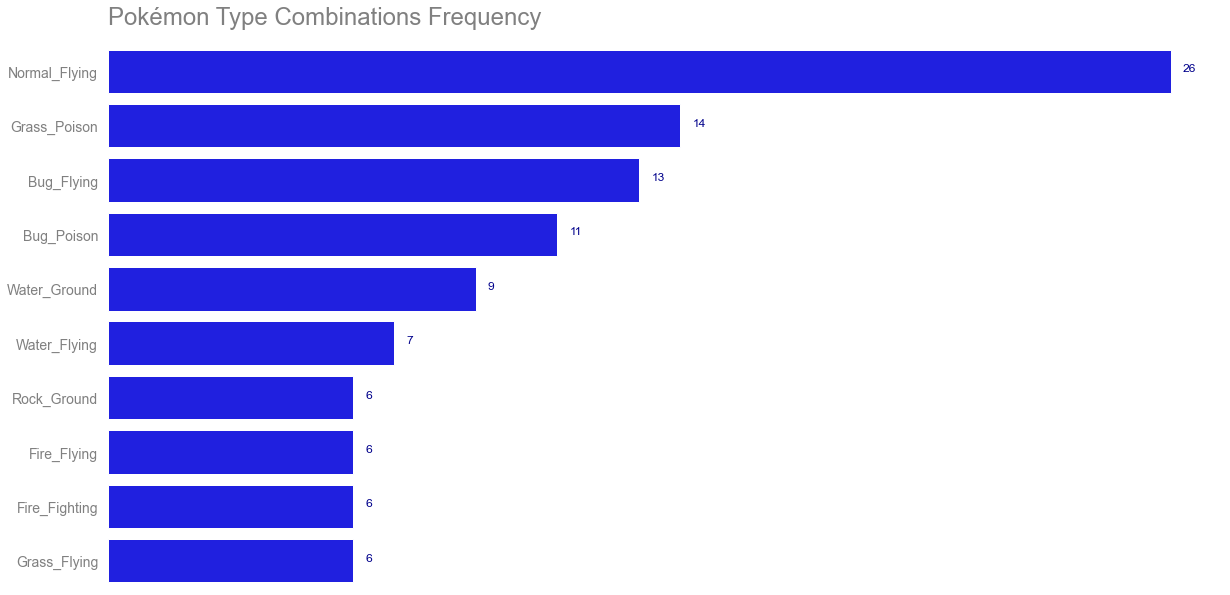

In [21]:
ax = sns.barplot(y=top10_type_counts.index, x=top10_type_counts.values, orient='h', color='blue')

ax.set_xlabel(xlabel='')
ax.set_xticklabels([])

ax.set_yticklabels(ax.get_yticklabels(), size=14)

ax.set_title('Pokémon Type Combinations Frequency', loc='left', pad=20)

sns.despine(top=True, right=True, left=True, bottom=True)

for index, value in enumerate(top10_type_counts): 
    plt.annotate(f'{value}', xy=(value + 0.3, index), color='darkblue') 

### Normal_Flying, Grass_Poison and Bug_Flying are the most common type combinations.

### 5. Most common types of legendary pokémon

In [22]:
legendary_pokemon = df[df['Is_Legendary'] == 1]
legendary_pokemon_types_top5 = legendary_pokemon["Type"].value_counts()[:5]

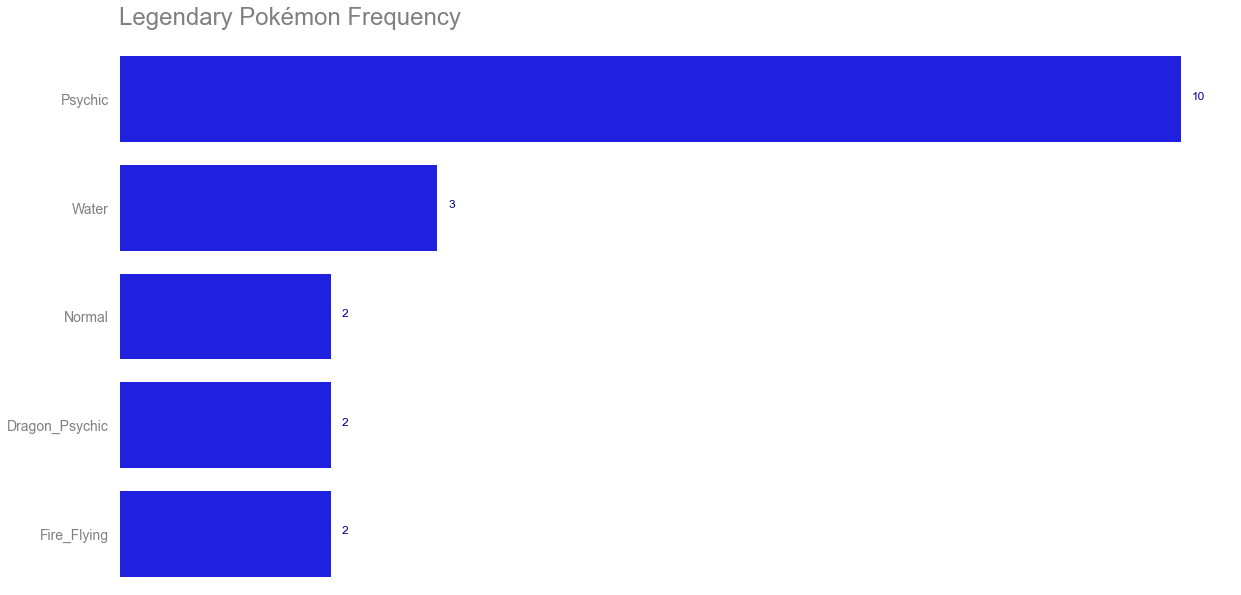

In [23]:
ax = sns.barplot(y=legendary_pokemon_types_top5.index, x=legendary_pokemon_types_top5.values, orient='h', color='blue')

ax.set_xlabel(xlabel='')
ax.set_xticklabels([])

ax.set_yticklabels(ax.get_yticklabels(), size=14)

ax.set_title('Legendary Pokémon Frequency', loc='left', pad=20)

sns.despine(top=True, right=True, left=True, bottom=True)

for index, value in enumerate(legendary_pokemon_types_top5): 
    plt.annotate(f'{value}', xy=(value + 0.1, index), color='darkblue') 

### Psychic is the most common type of legendary pokémon.

### 6.  Primary type vary across generations

In [24]:
type1_by_generation_group = df.groupby(['Generation', 'Type1'])['Name'].count().to_frame().reset_index()
type1_by_generation_group.rename(columns={'Name' : 'Count'}, inplace=True)

type1_by_generation_dict  = {}
for generation in list(type1_by_generation_group['Generation'].unique()):
    current_generation = []
    for type1 in type1_by_generation_group['Type1'].unique():
        try:
            current_generation.append(
                type1_by_generation_group.loc[(type1_by_generation_group['Generation']==generation) 
                                        & (type1_by_generation_group['Type1'] == type1)]['Count'].values[0])
        except IndexError:
            current_generation.append(0)
    type1_by_generation_dict[f'Generation {generation}'] = current_generation

type1_by_generation = pd.DataFrame(type1_by_generation_dict, index= type1_by_generation_group['Type1'].unique())
type1_by_generation

,Generation 1,Generation 2,Generation 3,Generation 4,Generation 5,Generation 6,Generation 7
Bug,12,10,12,8,18,3,9
Dragon,3,0,7,3,7,4,3
Electric,9,6,4,7,7,3,3
Fairy,2,5,0,1,0,9,1
Fighting,7,2,4,2,7,3,3
Fire,12,8,6,5,8,8,5
Ghost,3,1,4,6,5,4,4
Grass,12,9,12,13,15,5,12
Ground,8,3,6,4,9,0,2
Ice,2,4,6,3,6,2,0


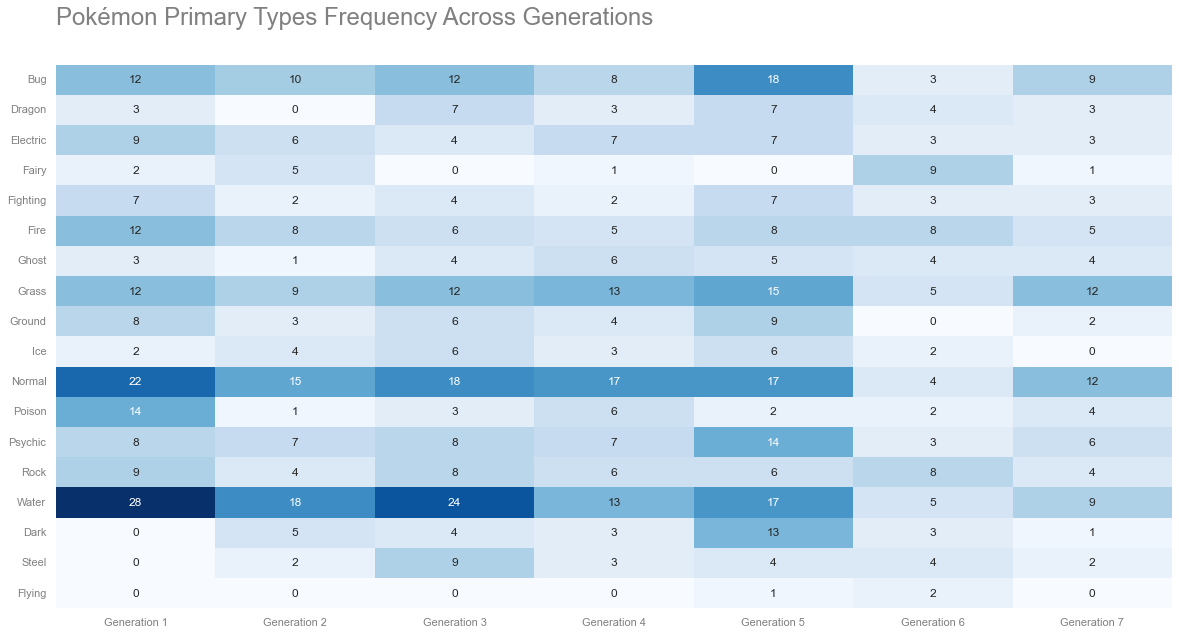

In [25]:
ax = sns.heatmap(type1_by_generation, annot= True, cbar=False, cmap='Blues')

ax.set_title('Pokémon Primary Types Frequency Across Generations', loc='left', pad=40);

Dark, Steel & Flying don't exist in generation 1 & dragon and flying in generation 2.

Flying only exists in generations 5 and 6.

There is an unusually high amount of poison in generation 1, steel in generation 3, dark & psychic in generation 5 
and fairy in generation 6.

### 7. Heavier and Taller Pokémon

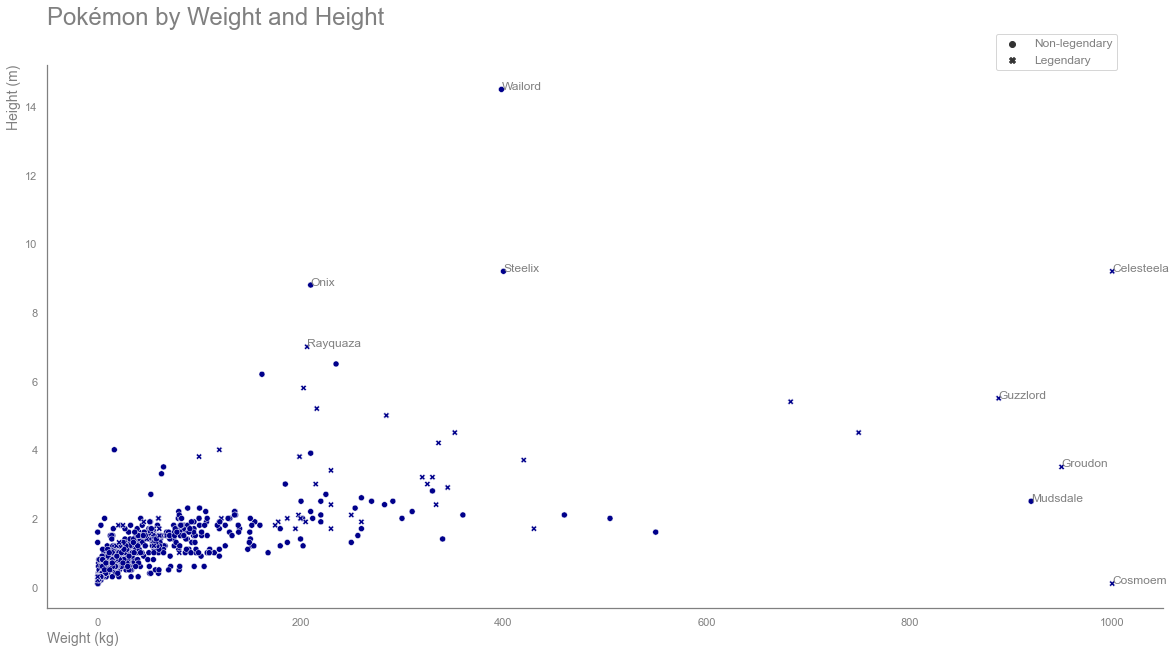

In [26]:
ax = sns.scatterplot(x = 'Weight_Kg', y = 'Height_M', style ='Is_Legendary', data=df, color='darkblue')

ax.set_xlabel(xlabel='Weight (kg)', loc='left')

ax.set_ylabel(ylabel='Height (m)', loc='top')

ax.set_title('Pokémon by Weight and Height', loc='left', pad=40)

sns.despine(top=True, right=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-legendary', 'Legendary'], loc=(0.85,0.99));

top5_weight_height_merged = pd.concat([df.nlargest(5, 'Height_M'), df.nlargest(5, 'Weight_Kg')]).drop_duplicates(subset=['Name'])
for index, row in top5_weight_height_merged.iterrows():
    plt.annotate(row['Name'], xy=(row['Weight_Kg'], row['Height_M']))

2 out of 5 of the tallest pokémon are legendary, while 4 out of 5 of the heavier pokémon are legendary.

Celesteela is the only pokémon in the top 5 in weight and height.

### 8. Best Generation?

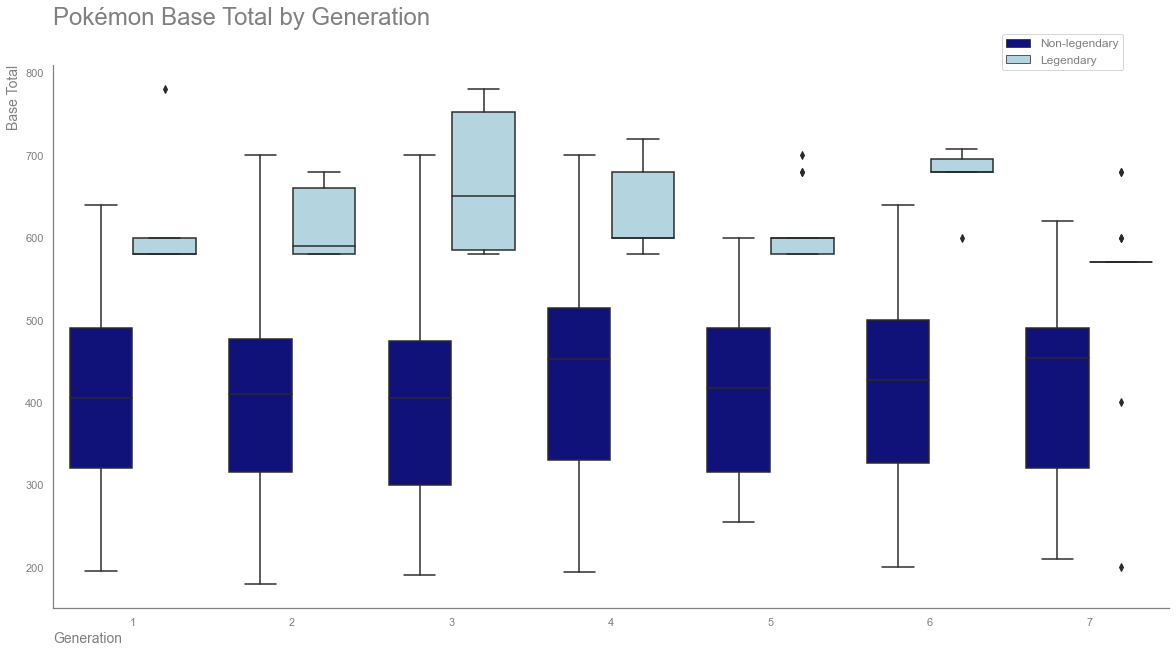

In [27]:
ax = sns.boxplot(x='Generation',y='Base_Total', hue='Is_Legendary', data = df, palette=['darkblue', 'lightblue'])

ax.set_xlabel(xlabel='Generation', loc='left')

ax.set_ylabel(ylabel='Base Total', loc='top')

ax.set_title('Pokémon Base Total by Generation', loc='left', pad=40)

sns.despine(top=True, right=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-legendary', 'Legendary'], loc=(0.85,0.99));

###  Generation 4 has the best pokémon, while generation 3 has the best legendary pokémon.

### 9. Attributes Relation

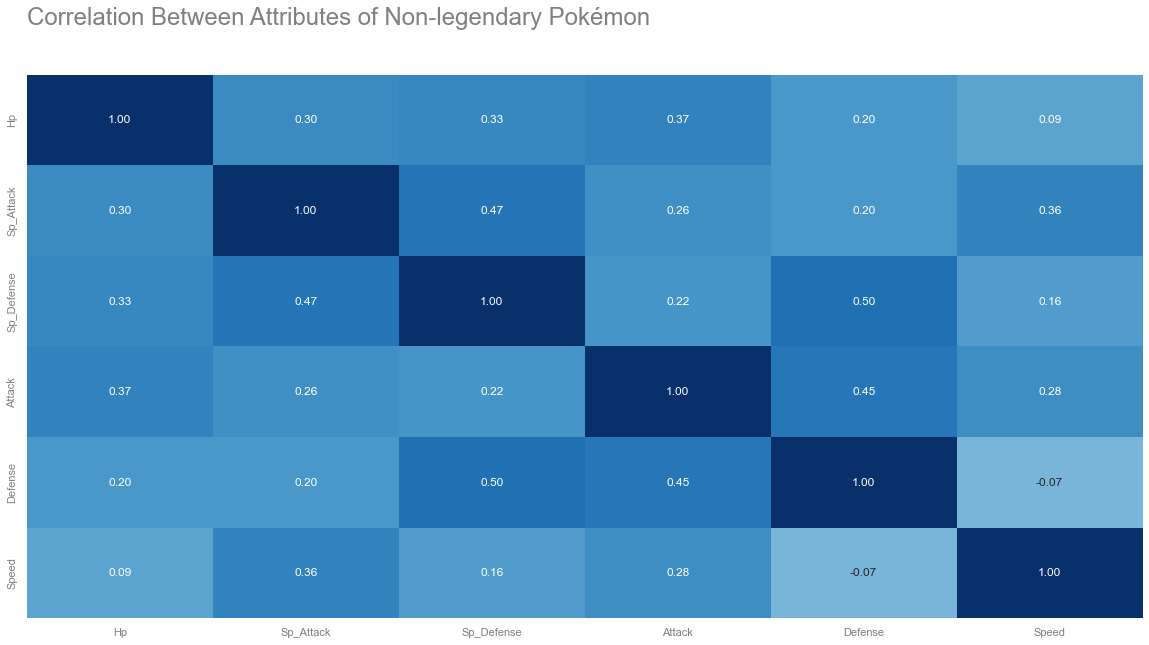

In [28]:
ax = sns.heatmap((df[df['Is_Legendary']==0].loc[:,['Hp','Sp_Attack','Sp_Defense','Attack','Defense','Speed']]).corr(),
            annot= True,
            fmt = ".2f",
            vmin = -1,
            vmax = 1,
            cbar=False,
            cmap='Blues')

ax.set_title('Correlation Between Attributes of Non-legendary Pokémon', loc='left', pad=50);

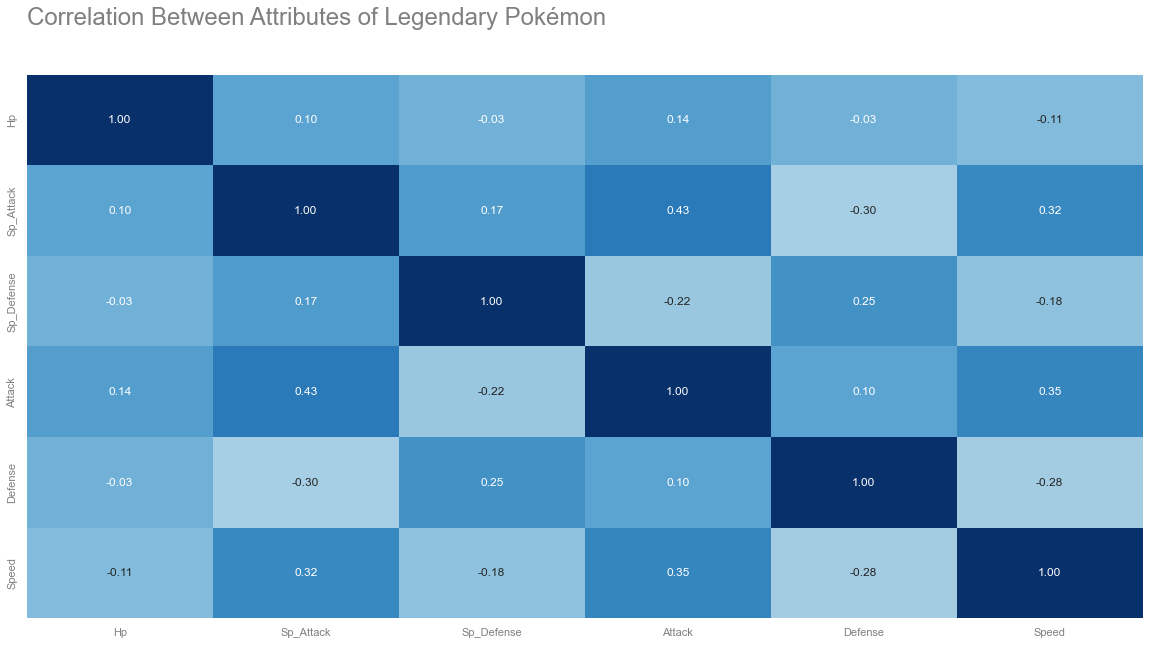

In [29]:
ax = sns.heatmap((df[df['Is_Legendary']==1].loc[:,['Hp','Sp_Attack','Sp_Defense','Attack','Defense','Speed']]).corr(),
            annot= True,
            fmt = ".2f",
            vmin = -1,
            vmax = 1,
            cbar=False,
            cmap='Blues')

ax.set_title('Correlation Between Attributes of Legendary Pokémon', loc='left', pad=50);

Regarding non-legendary pokémon

1. Attack has the strongest relationship with defense.
2. Defense has the strongest relationship with sp_defense.
3. Speed has a very weak negative relationship with defense.

Regarding legendary pokémon

The relationships between attack and sp_defense and defense and sp_attack changed to negative. Plus, the relationship between attack and speed and defense and speed got stronger (positive and negative, respectively).

### 10. Best Type

In [30]:
non_legendary_pokemon_attributes = df[df['Is_Legendary']==0].groupby(['Type1']).median()[['Attack', 'Sp_Attack', 'Defense', 'Sp_Defense', 'Hp', 'Speed', 'Base_Total']]

legendary_pokemon_attributes = df[df['Is_Legendary']==1].groupby(['Type1']).median()[['Attack', 'Sp_Attack', 'Defense', 'Sp_Defense', 'Hp', 'Speed', 'Base_Total']]

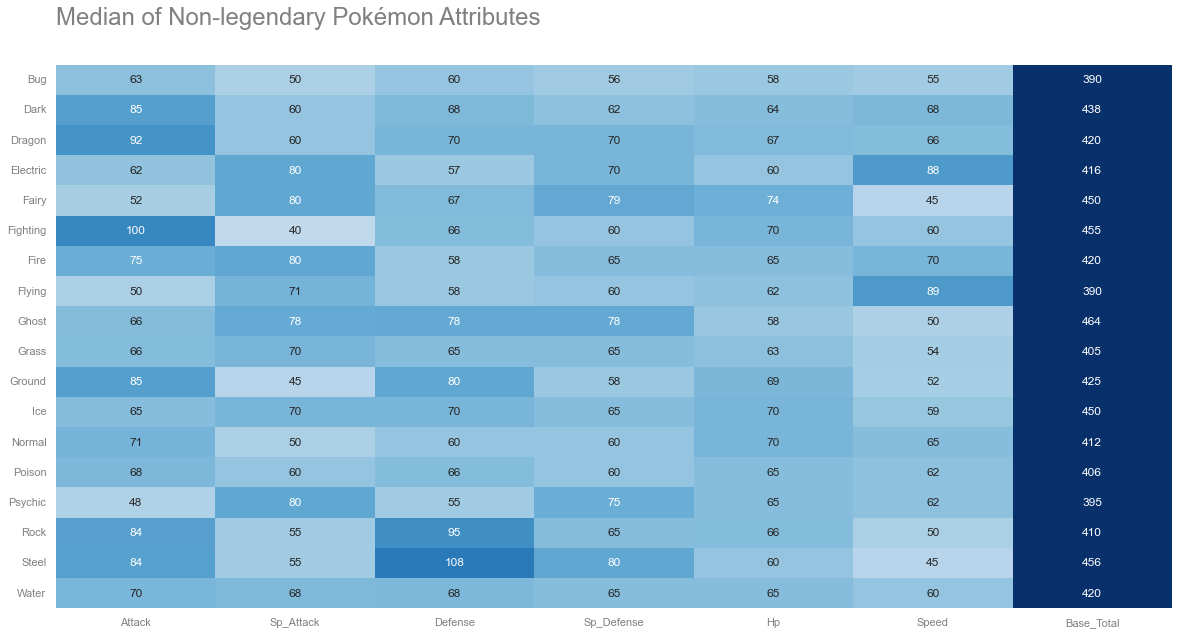

In [31]:
ax = sns.heatmap(non_legendary_pokemon_attributes,
            annot= True,
            fmt = ".0f",
            vmin = 0,
            vmax = 150,
            cbar=False,
            cmap='Blues')

ax.set_ylabel(ylabel='')

ax.set_title('Median of Non-legendary Pokémon Attributes', loc='left', pad=40);

Regarding non-legendary pokémon:
   * Top 5 types - attack: fighting, dragon, ground, dark, steel
   * Top 5 types - sp_attack: psychic, electric, fairy, fire, ghost
   * Top 5 types - defense: steel, rock, ground, ghost, ice
   * Top 5 types - sp_defense: steel, fairy, ghost, psychic, dragon
   * Top 5 types - hp: fairy, normal, fighting, ice, ground
   * Top 5 types - speed: flying, electric, fire, dark, dragon
   * Top 5 types - base_total: ghost, steel, fighting, fairy and ice \
>Good types to attack are electric, fire, dark and dragon, since they are in the top 5 for attack or sp_attack and speed.\
Good types to defend are fairy, ice and ground, since they are in the top 5 for defense or sp_defense and hp.




### To highlight Ground, which is in the top 5 for attack, defense and hp

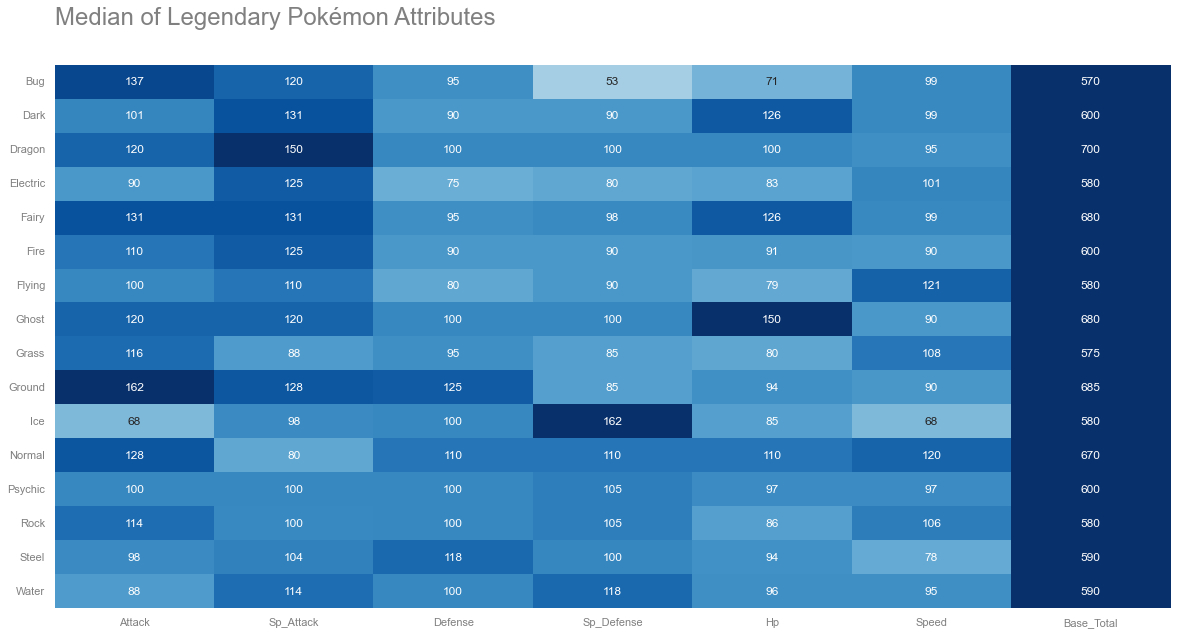

In [32]:
ax = sns.heatmap(legendary_pokemon_attributes,
            annot= True,
            fmt = ".0f",
            vmin = 0,
            vmax = 150,
            cbar=False,
            cmap='Blues')

ax.set_ylabel(ylabel='')

ax.set_title('Median of Legendary Pokémon Attributes', loc='left', pad=40);

Regarding legendary pokémon:
* Top 5 types - attack: ground, bug, fairy, normal, dragon
* Top 5 types - sp_attack: dragon, dark, fairy, ground, electric
* Top 5 types - defense: ground, steel, normal, dragon, ghost
* Top 5 types - sp_defense: ice, water, normal, psychic, rock
* Top 5 types - hp: ghost, dark, fairy, normal, dragon
* Top 5 types - speed: flying, normal, grass, rock, electric
* Top 5 types - base_total: dragon, ground, fairy, ghost, normal

>Good types to attack are normal and electric, since they are in the top 5 for attack or sp_attack and speed.\
>Good types to defend are ghost, normal and dragon, since they are in the top 5 for defense or sp_defense and hp.

### To highlight Normal, which is in the top 5 for attack, defense, sp_defense, hp, speed and base_total.

### 11. Best Pokémon

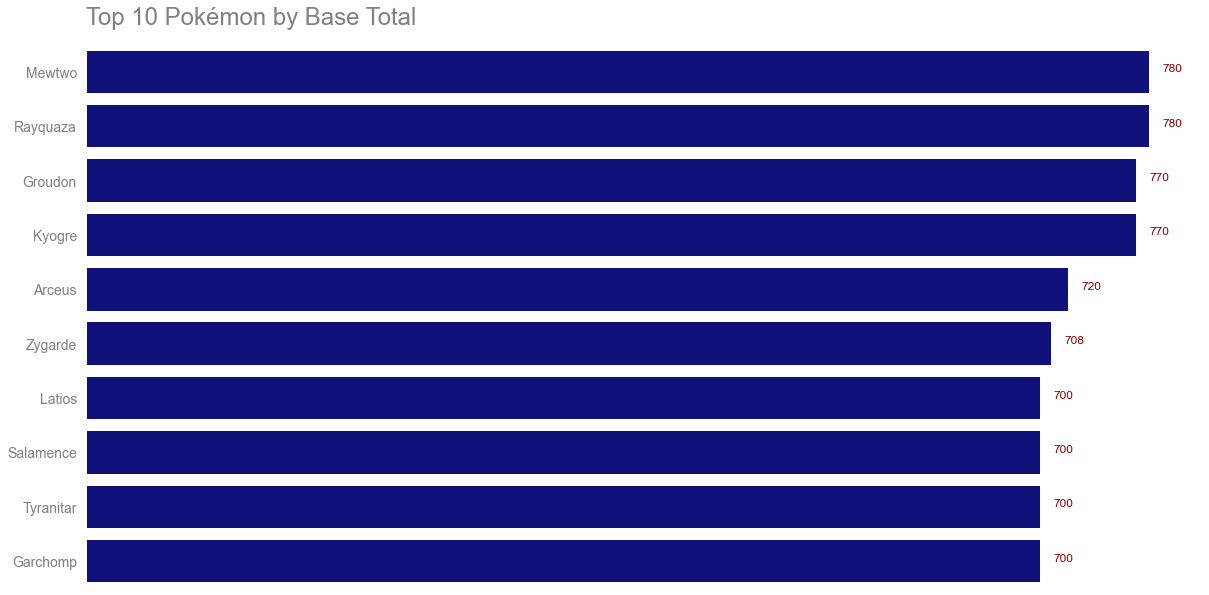

In [33]:
top10_pokemon_base_total = df.sort_values(by='Base_Total', ascending=False).reset_index()[:10]

ax = sns.barplot(y=top10_pokemon_base_total['Name'], x=top10_pokemon_base_total['Base_Total'], orient='h', color='darkblue')

ax.set_xlabel(xlabel='')
ax.set_xticklabels([])

ax.set_ylabel(ylabel='')
ax.set_yticklabels(ax.get_yticklabels(), size=14)

ax.set_title('Top 10 Pokémon by Base Total', loc='left', pad=20)

sns.despine(top=True, right=True, left=True, bottom=True)

for index, row in top10_pokemon_base_total.iterrows(): 
    plt.annotate(row['Base_Total'], xy=(row['Base_Total'] + 10, index), color='darkred')

In [34]:
attributes=['Attack', 'Sp_Attack', 'Defense', 'Sp_Defense', 'Hp', 'Speed']

mewtwo= top10_pokemon_base_total[top10_pokemon_base_total['Name'] == 'Mewtwo'][attributes].values.tolist()[0]
rayquaza = top10_pokemon_base_total[top10_pokemon_base_total['Name'] == 'Rayquaza'][attributes].values.tolist()[0]

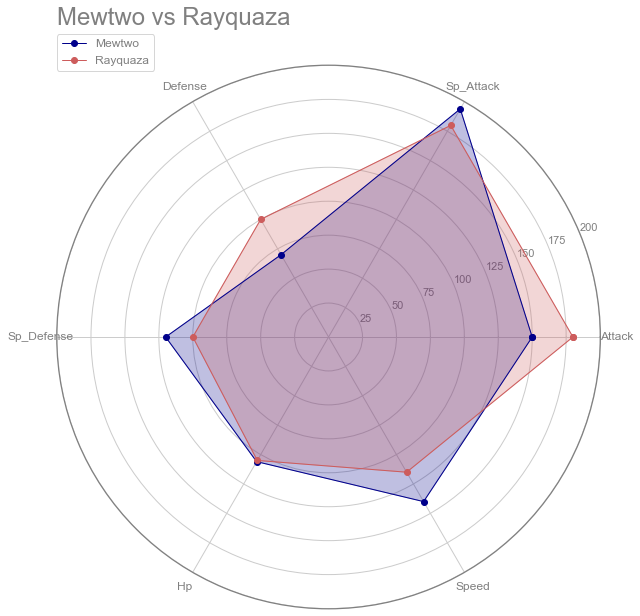

In [35]:
angles=np.linspace(0,2*np.pi,len(attributes), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
attributes.append(attributes[0])
mewtwo.append(mewtwo[0])
rayquaza.append(rayquaza[0])

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111, polar=True)

# Mewtwo Plot
ax.plot(angles, mewtwo, 'o-', color='darkblue', linewidth=1, label='Mewtwo')
ax.fill(angles, mewtwo, alpha=0.25, color='darkblue')

# Rayquaza Plot
ax.plot(angles,rayquaza, 'o-', color='indianred', linewidth=1, label='Rayquaza')
ax.fill(angles, rayquaza, alpha=0.25, color='indianred')

ax.set_thetagrids(angles[:-1] * 180/np.pi, attributes[:-1], fontsize=12)
plt.grid(True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Mewtwo', 'Rayquaza'], loc=(0,0.99));

ax.set_title("Mewtwo vs Rayquaza", loc='left', pad=40);

### Rayquaza has better attack and defense while Mewtwo is better considering the remaining attributes.